In [1]:
import os
os.environ['R_HOME'] = '/home/qukun/xuhao/miniconda3/envs/giotto/lib/R' 
import shutil
shutil.which("R")

'/home/qukun/xuhao/miniconda3/envs/palantir/bin/R'

In [2]:
import palantir

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=150,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3

In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=150,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3
import sys
sys.path.append("/home/qukun/xuhao/workspace/Utils")
import sc_plot
from sc_process import grouped_obs_mean
from sc_plot import plot_proportion

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
cx_pbmc_immune_cd4_raw = sc.read_h5ad('../scripts/CX_20211030/cx_pbmc_immune_results/cx_pbmc_immune_cd4_palantir.h5ad')

In [8]:
pbmc_immune_cd4_raw = cx_pbmc_immune_cd4_raw[cx_pbmc_immune_cd4_raw.obs.tissue == 'PBMC']

In [9]:
start_cell_cd4 = cx_pbmc_immune_cd4_raw.obs_names[cx_pbmc_immune_cd4_raw.obsm['X_phate'][:,0].argmax()]
terminal_state = pd.Series(
    ['T_CD4_CXCL13','T_CD4_FOXP3','T_CD4_TNFSFR4'],
    index = [
        cx_pbmc_immune_cd4_raw.obs_names[cx_pbmc_immune_cd4_raw[cx_pbmc_immune_cd4_raw.obs.celltype_minor == 'T_CD4_CXCL13'].obsm['X_phate'][:,0].argmin()],
        cx_pbmc_immune_cd4_raw.obs_names[cx_pbmc_immune_cd4_raw[cx_pbmc_immune_cd4_raw.obs.celltype_minor == 'T_CD4_FOXP3'].obsm['X_phate'][:,1].argmax()],
        cx_pbmc_immune_cd4_raw.obs_names[cx_pbmc_immune_cd4_raw[cx_pbmc_immune_cd4_raw.obs.celltype_minor == 'T_CD4_TNFSFR4'].obsm['X_phate'][:,1].argmin()]
    ])
pr_res_cd4 = sc.external.tl.palantir_results(cx_pbmc_immune_cd4_raw, start_cell_cd4, terminal_states = terminal_state.index, ms_data='X_phate',num_waypoints=500, n_jobs=4, scale_components=True, use_early_cell_as_start=False, max_iterations=25,knn=30)

Palantir computing waypoints..
Sampling and flocking waypoints...
Time for determining waypoints: 0.031095818678538004 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Time for shortest paths: 2.049653911590576 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...


/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:447: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ent = ent.append(pd.Series(0, index=terminal_states))
/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:450: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branch_probs = branch_probs.append(bp.loc[:, branch_probs.columns])


Project results to all cells...


In [10]:
umap = pd.DataFrame(cx_pbmc_immune_cd4_raw.obsm['X_phate'], index=cx_pbmc_immune_cd4_raw.obs_names,columns=['x','y'])

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


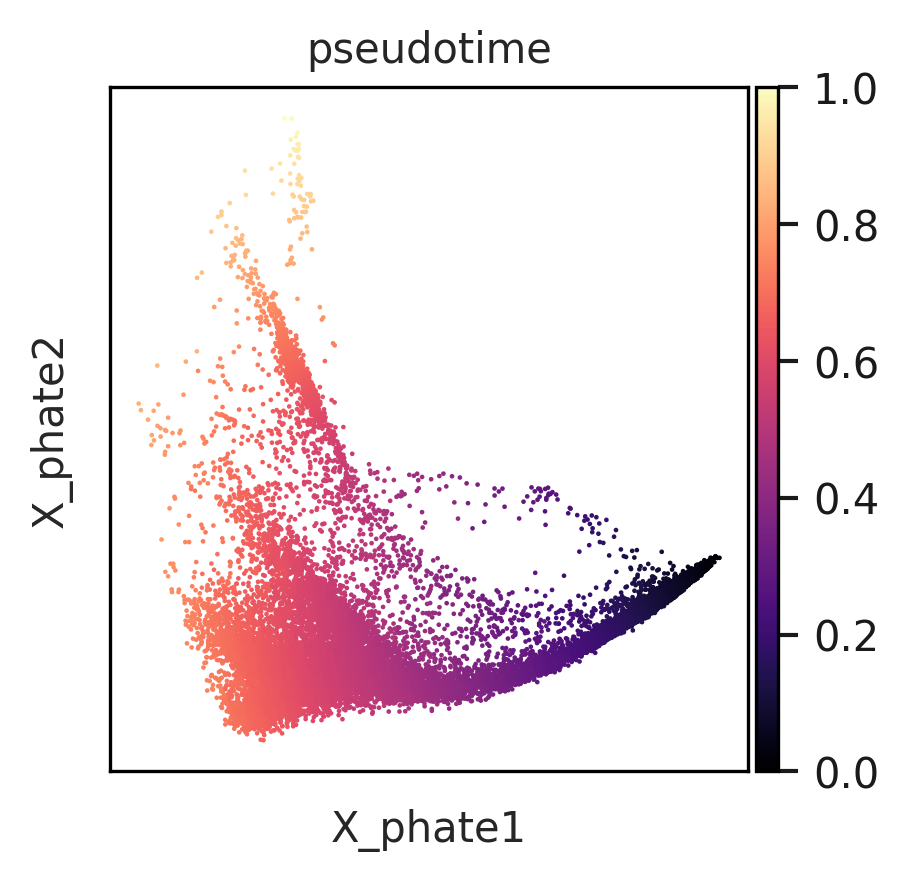

In [11]:
sc.pl.embedding(cx_pbmc_immune_cd4_raw[np.random.permutation(cx_pbmc_immune_cd4_raw.obs_names)], 'X_phate',color=['pseudotime'],cmap='magma',s=5)

In [26]:
cx_pbmc_immune_cd4_raw.obsm['X_phate']

array([[ 3.1989854e-02,  2.1338772e-03],
       [-1.8682754e-02,  4.4000833e-03],
       [-1.8945716e-02,  3.1321511e-02],
       ...,
       [-2.3364995e-04, -3.1619931e-03],
       [ 2.9486246e-02, -7.6921177e-05],
       [ 1.7238704e-02, -2.2059907e-03]], dtype=float32)

In [27]:
cx_pbmc_immune_cd4_raw.obs[['phate_1','phate_2']] = cx_pbmc_immune_cd4_raw.obsm['X_phate']

In [35]:
cx_pbmc_immune_cd4_raw

AnnData object with n_obs × n_vars = 20744 × 23165
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'ident', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'sample', 'RNA_snn_res.2', 'seurat_clusters', 'celltype_submarkers', 'celltype_major', 'celltype_minor', 'RNA_snn_res.1', 'RNA_snn_res.1.5', 'tissue', 'RNA_snn_res.0.5', 'integrated_snn_res.2', 'integrated_snn_res.1.5', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.2.5', 'integrated_snn_res.3', 'cli_state', 'tissue_cli', 'major_celltype', 'pseudotime', 'phate_1', 'phate_2'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_minor_colors', 'cli_state_colors', 'rank_genes_groups', 'sample_colors', 'seurat_clusters_colors', 'tissue_colors', 'hvg'
    obsm: 'X_pca', 'X_phate', 'X_umap'
    layers: 'scaled'

In [37]:
pd.concat([cx_pbmc_immune_cd4_raw.obs[['celltype_minor','cli_state','tissue','pseudotime','phate_1','phate_2']],cx_pbmc_immune_cd4_raw.to_df().loc[:,['CTLA4','FOXP3','CD80','CD70','TNFSF14','TNFSF9','TNFRSF4','TNFSF8','TNFRSF1B','TNFRSF13B','IFNG','IL2RA','HLA-DRB1','HLA-DMA','HLA-DQA1']]],axis=1).to_csv('source_data/source_data_sfig6a&d.csv')

In [12]:
sc.pp.highly_variable_genes(cx_pbmc_immune_cd4_raw,n_top_genes=5000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:13)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [13]:
ad = cx_pbmc_immune_cd4_raw
genes = cx_pbmc_immune_cd4_raw.var_names[cx_pbmc_immune_cd4_raw.var['highly_variable']==True].values
# genes = cx_pbmc_immune_cd4_raw.var_names[cx_pbmc_immune_cd4_raw.var['highly_variable']==True].values[:100]
imp_df = pd.DataFrame(ad[:, genes].to_df(), 
                     index=ad.obs_names, columns=genes)

In [14]:
gene_trends = palantir.presults.compute_gene_trends(pr_res_cd4, imp_df,n_jobs=10)

AGGTGTTCATCAGCGC-1_6_1


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falli

Time for processing AGGTGTTCATCAGCGC-1_6_1: 10.77603584130605 minutes
GTACAACCACTGAGGA-1_5_1
Time for processing GTACAACCACTGAGGA-1_5_1: 8.628971608479818 minutes
TGGGTTATCTTACGGA-1_7_1
Time for processing TGGGTTATCTTACGGA-1_7_1: 8.567855858802796 minutes


In [17]:
trends = gene_trends['AGGTGTTCATCAGCGC-1_6_1']['trends']
gene_clusters = palantir.presults.cluster_gene_trends(trends,n_jobs=1)

Finding 150 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 4.3447487354278564 seconds
Jaccard graph constructed in 33.417232513427734 seconds
Wrote graph to binary file in 0.4775731563568115 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.769828
After 17 runs, maximum modularity is Q = 0.771065
After 34 runs, maximum modularity is Q = 0.772509
Louvain completed 54 runs in 18.69054412841797 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 57.958391427993774 seconds


In [21]:
gene_trends['AGGTGTTCATCAGCGC-1_6_1']['trends'].to_csv('../scripts/CX_20211030/cx_pbmc_immune_results/cx_pbmc_T_CD4_CXCL13_palantir_pseudotime_gene_trends.csv')

In [22]:
gene_clusters.to_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_CXCL13_palantir_pseudotime_gene_cluster.csv')

df = pd.DataFrame()
for c in np.unique(gene_clusters):
    df = pd.concat([df,pd.DataFrame(gene_clusters[gene_clusters==c].index,columns=[c])],axis=1)

df.to_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_CXCL13_palantir_pseudotime_gene_cluster_genes.csv')

palantir.plot.plot_gene_trend_clusters(trends, gene_clusters)
plt.savefig('cx_pbmc_immune_results/cx_pbmc_T_CD4_CXCL13_palantir_pseudotime_gene_cluster.pdf')

In [24]:
gene_trends = palantir.presults.compute_gene_trends(pr_res_cd4, imp_df,n_jobs=10,lineages=['GTACAACCACTGAGGA-1_5_1'])

GTACAACCACTGAGGA-1_5_1


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falli

Time for processing GTACAACCACTGAGGA-1_5_1: 19.637216019630433 minutes


In [25]:
trends = gene_trends['GTACAACCACTGAGGA-1_5_1']['trends']
gene_clusters = palantir.presults.cluster_gene_trends(trends,n_jobs=1)

Finding 150 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.0630221366882324 seconds
Jaccard graph constructed in 38.860673666000366 seconds
Wrote graph to binary file in 0.6436448097229004 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.77385
After 3 runs, maximum modularity is Q = 0.775366
After 5 runs, maximum modularity is Q = 0.776617
After 16 runs, maximum modularity is Q = 0.77814
Louvain completed 36 runs in 51.739402055740356 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 115.78392291069031 seconds


In [22]:
gene_trends['GTACAACCACTGAGGA-1_5_1']['trends'].to_csv('../scripts/CX_20211030/cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_trends.csv')

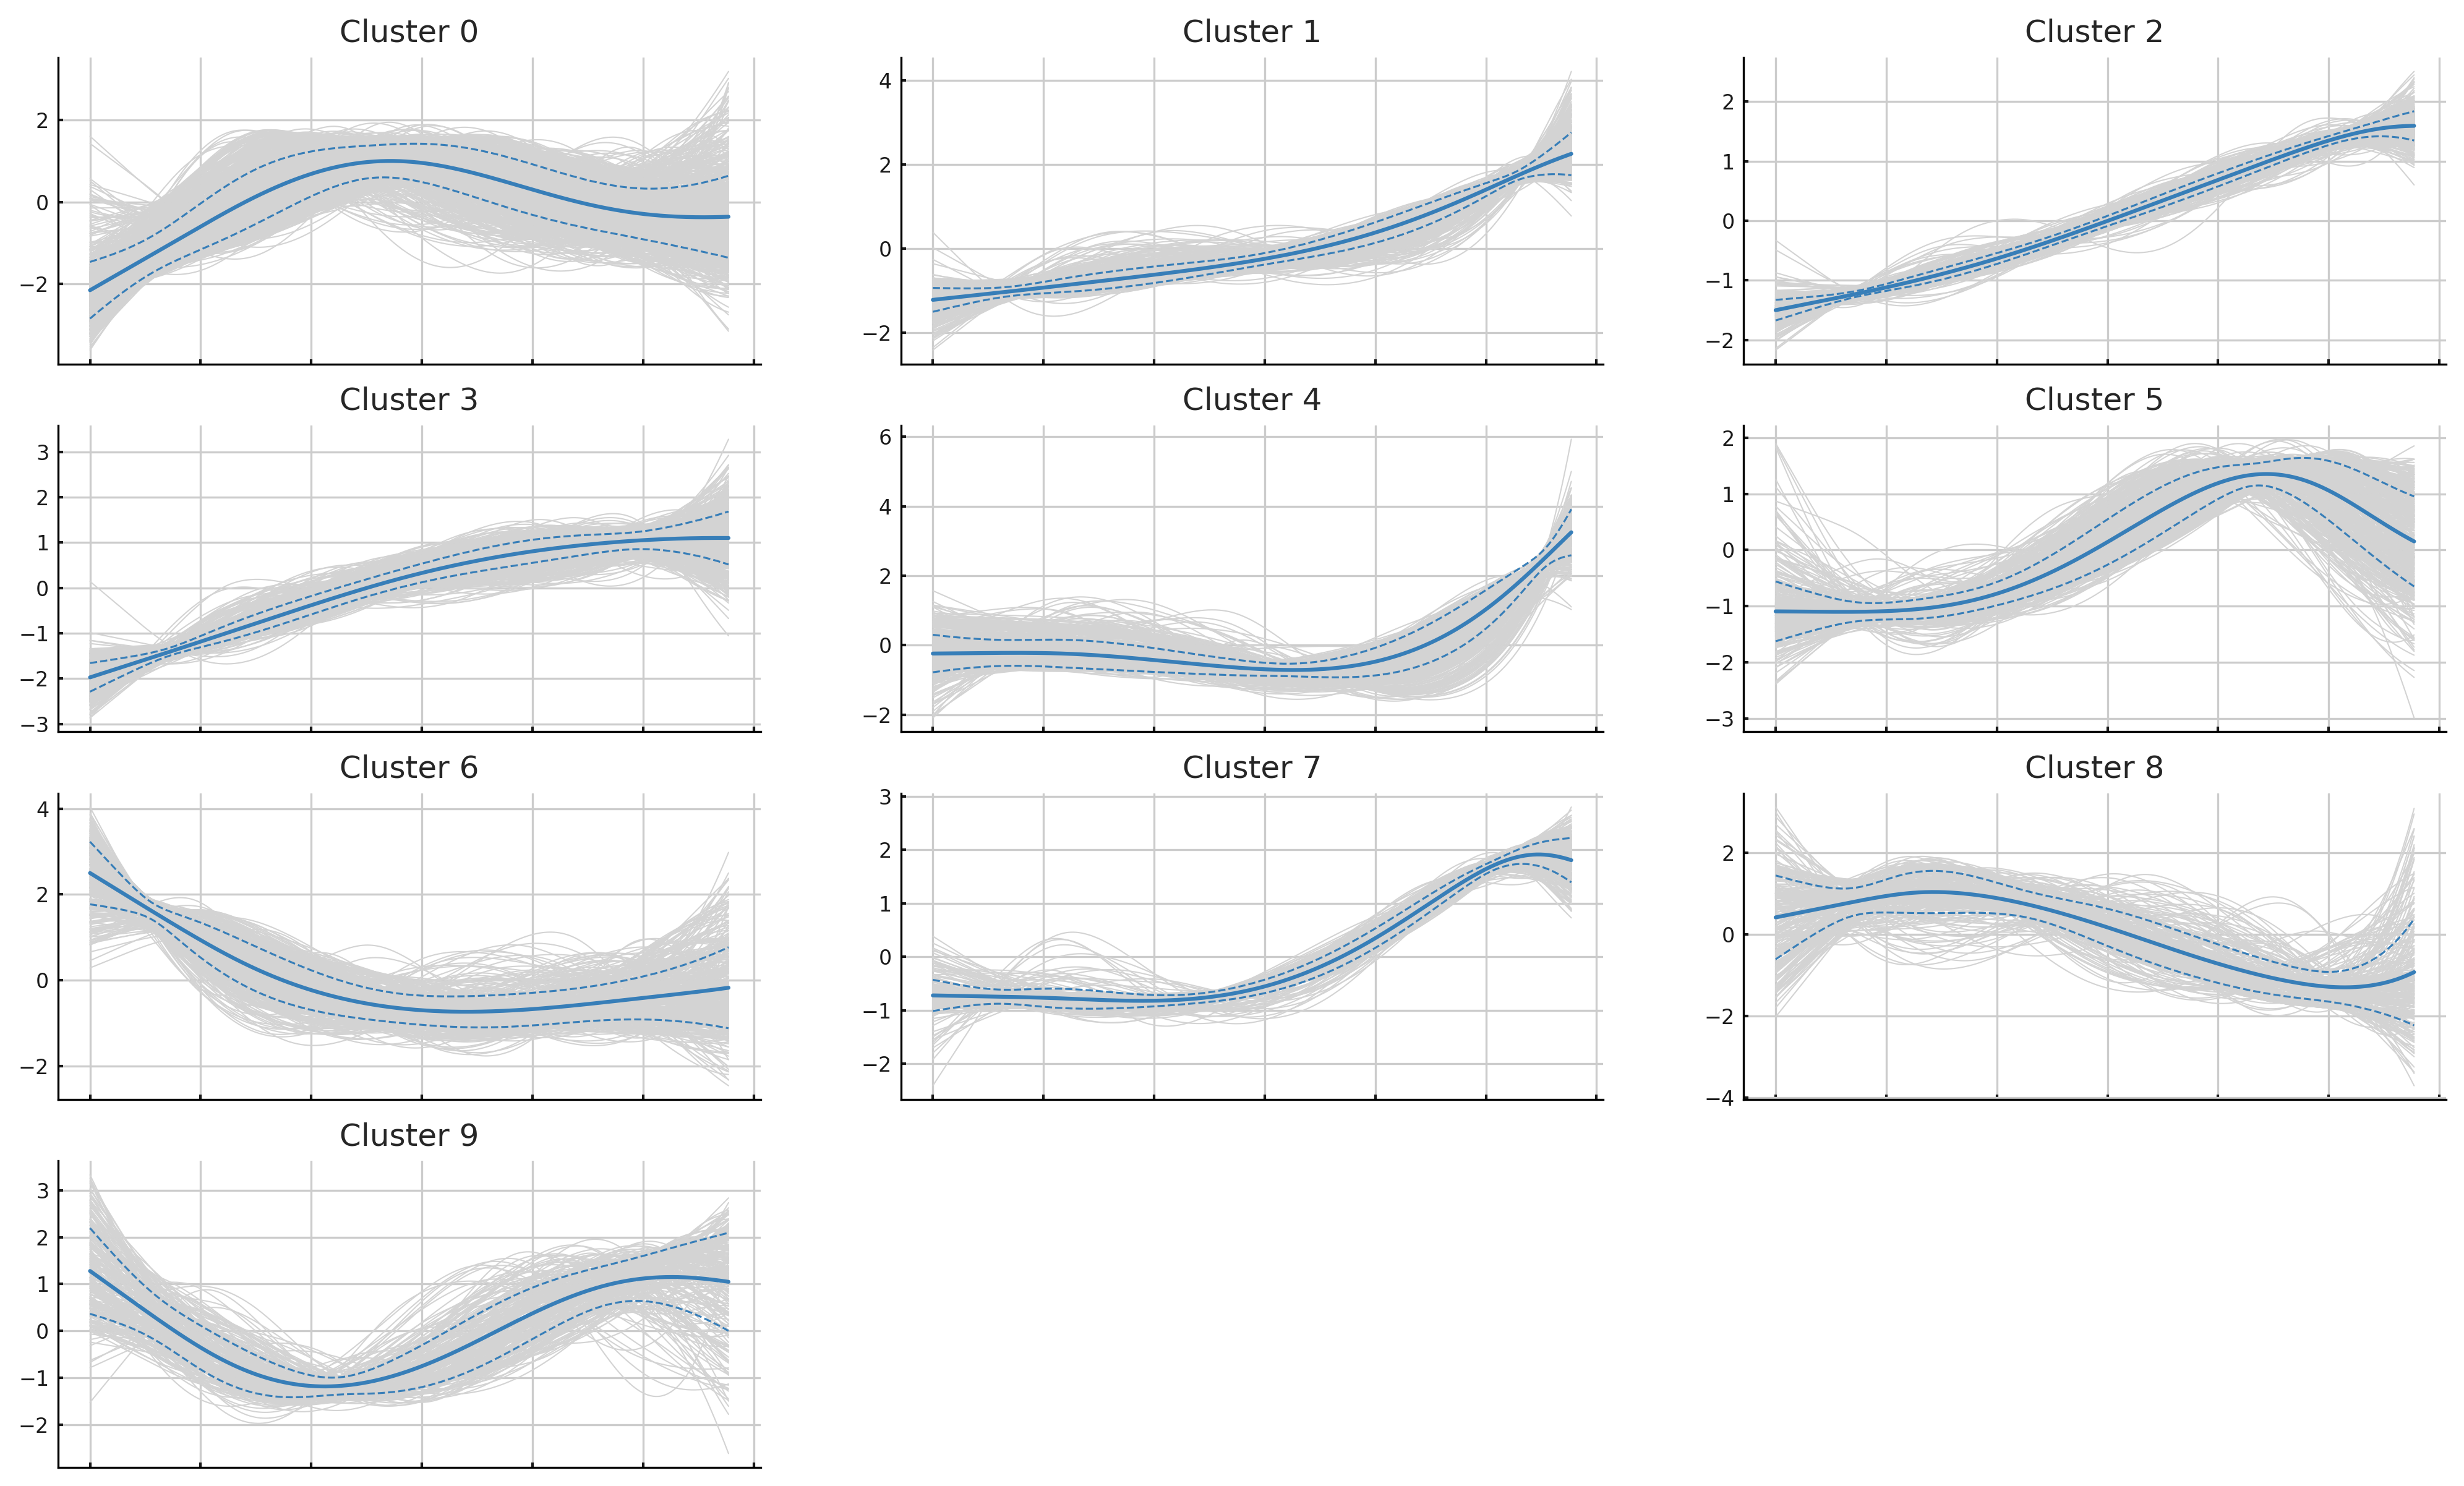

In [26]:
# gene_clusters.to_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_cluster.csv')
gene_clusters = pd.read_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_cluster.csv')

df = pd.DataFrame()
for c in np.unique(gene_clusters):
    df = pd.concat([df,pd.DataFrame(gene_clusters[gene_clusters==c].index,columns=[c])],axis=1)

df.to_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_cluster_genes.csv',index=None)

palantir.plot.plot_gene_trend_clusters(trends, gene_clusters)
plt.savefig('cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_cluster.pdf')

In [96]:
gene_clusters = pd.read_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_cluster.csv',index_col=0)

df = pd.DataFrame()
for c in np.unique(gene_clusters['0']):
    df = pd.concat([df,pd.DataFrame(gene_clusters[gene_clusters['0']==c].index,columns=[c])],axis=1)

df.to_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_cluster_genes.csv',index=None)

gene_clusters = pd.read_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_CXCL13_palantir_pseudotime_gene_cluster.csv',index_col=0)

df = pd.DataFrame()
for c in np.unique(gene_clusters['0']):
    df = pd.concat([df,pd.DataFrame(gene_clusters[gene_clusters['0']==c].index,columns=[c])],axis=1)

df.to_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_CXCL13_palantir_pseudotime_gene_cluster_genes.csv',index=None)

In [103]:
cxcl13_gene_clusters = pd.read_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_cluster.csv',index_col=0)
foxp3_gene_clusters = pd.read_csv('cx_pbmc_immune_results/cx_pbmc_T_CD4_FOXP3_palantir_pseudotime_gene_cluster.csv',index_col=0)

9                    Cytokine Signaling in Immune system
37            positive regulation of cytokine production
56     positive regulation of response to external st...
5                 cellular response to cytokine stimulus
33                             Signaling by Interleukins
552                                 Viral carcinogenesis
1                     regulation of leukocyte activation
184              positive regulation of defense response
67                        regulation of defense response
7                                        cell activation
Name: Description, dtype: object


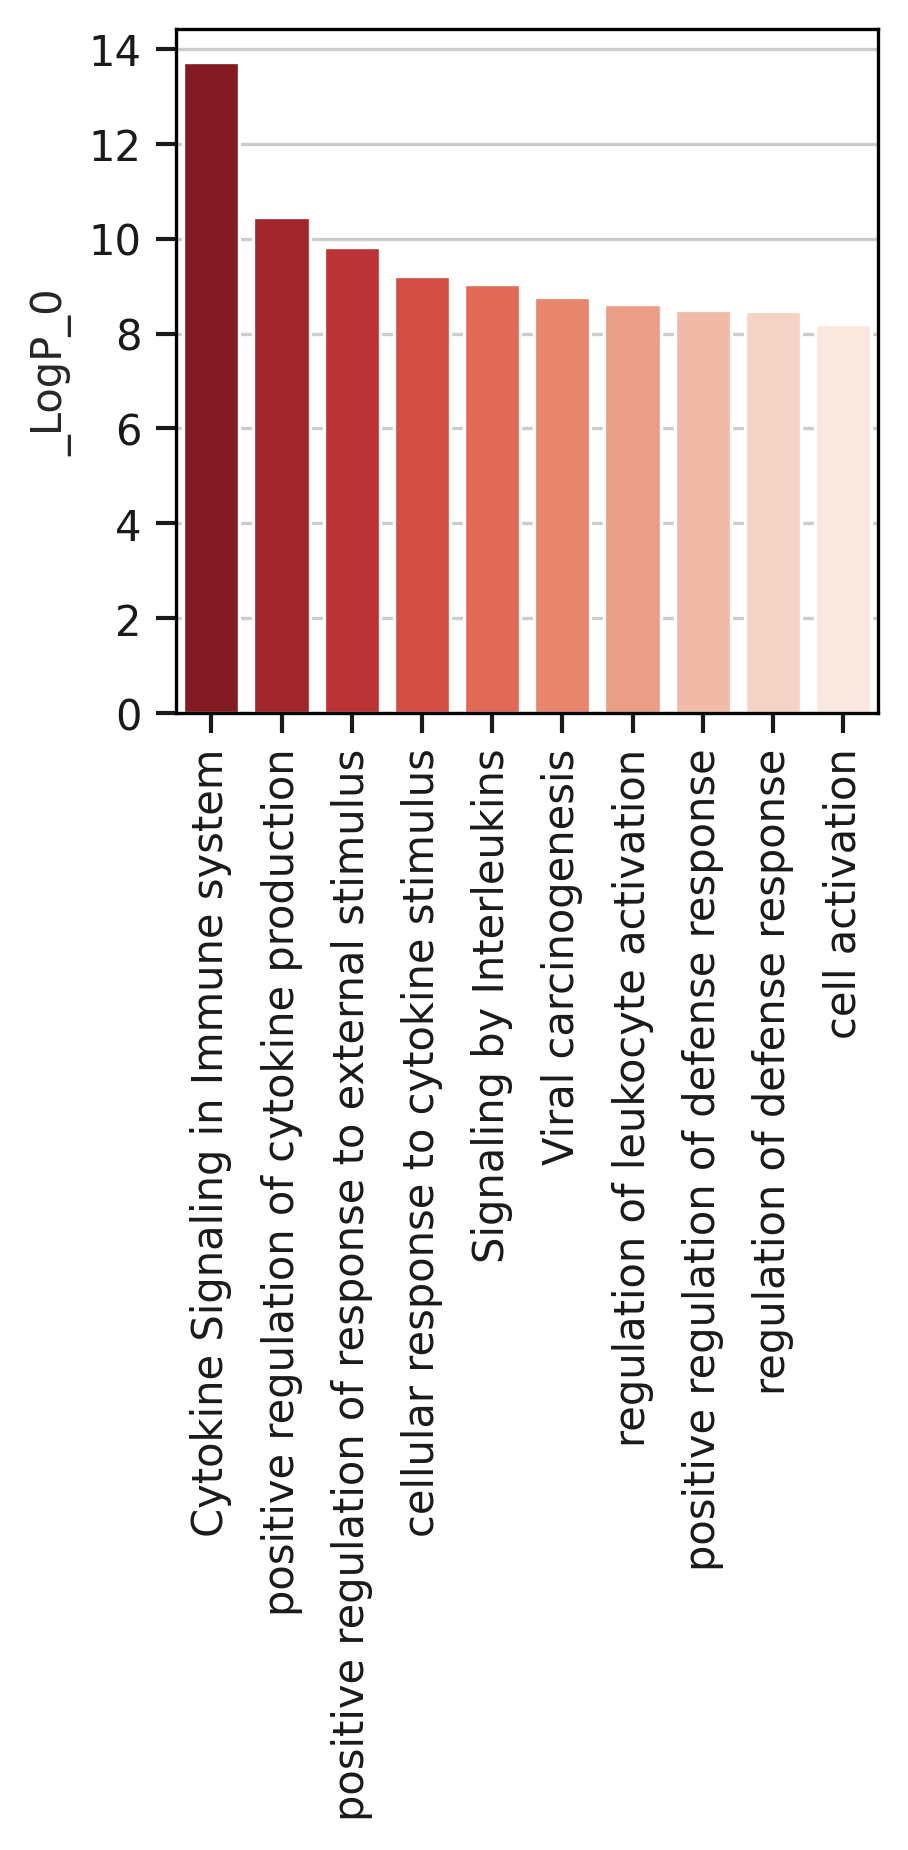

0                    regulation of cell activation
1               regulation of leukocyte activation
3                      regulation of cell adhesion
4              regulation of lymphocyte activation
7                                  cell activation
50               positive regulation of cell death
32                            leukocyte activation
82    positive regulation of programmed cell death
87        positive regulation of apoptotic process
45      regulation of leukocyte cell-cell adhesion
Name: Description, dtype: object


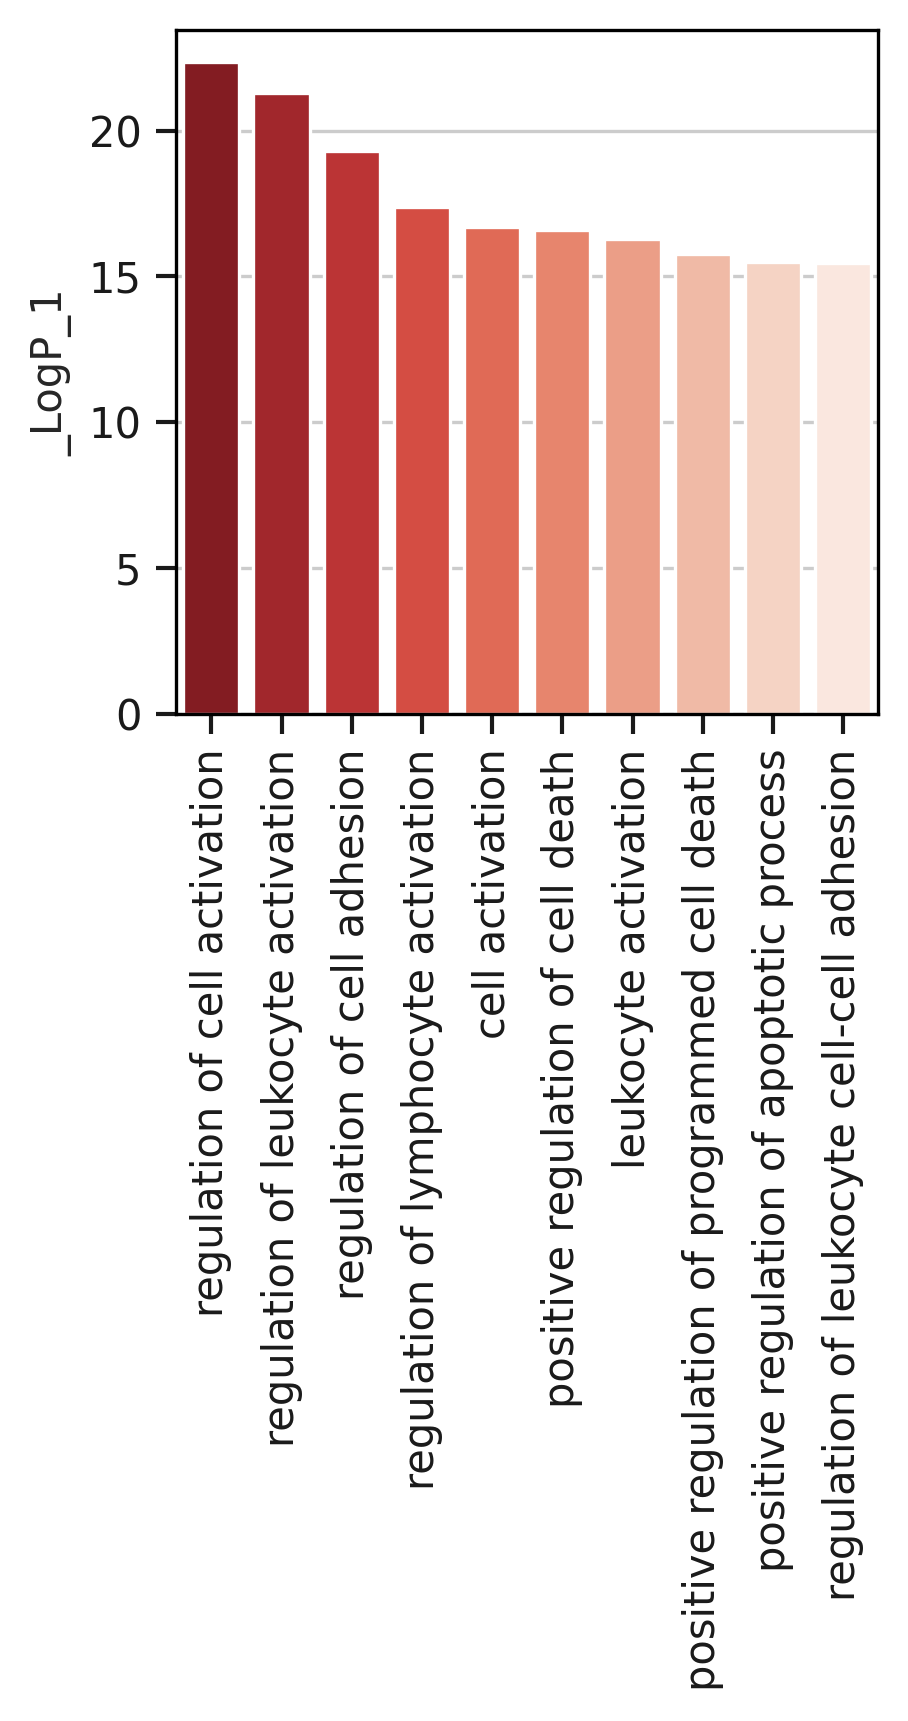

369                       chromatin organization
165    regulation of cellular response to stress
42               regulation of T cell activation
191               Signaling by Nuclear Receptors
31                     response to growth factor
0                  regulation of cell activation
208                       ESR-mediated signaling
231           Estrogen-dependent gene expression
161                Cellular responses to stimuli
49                      Signaling by Rho GTPases
Name: Description, dtype: object


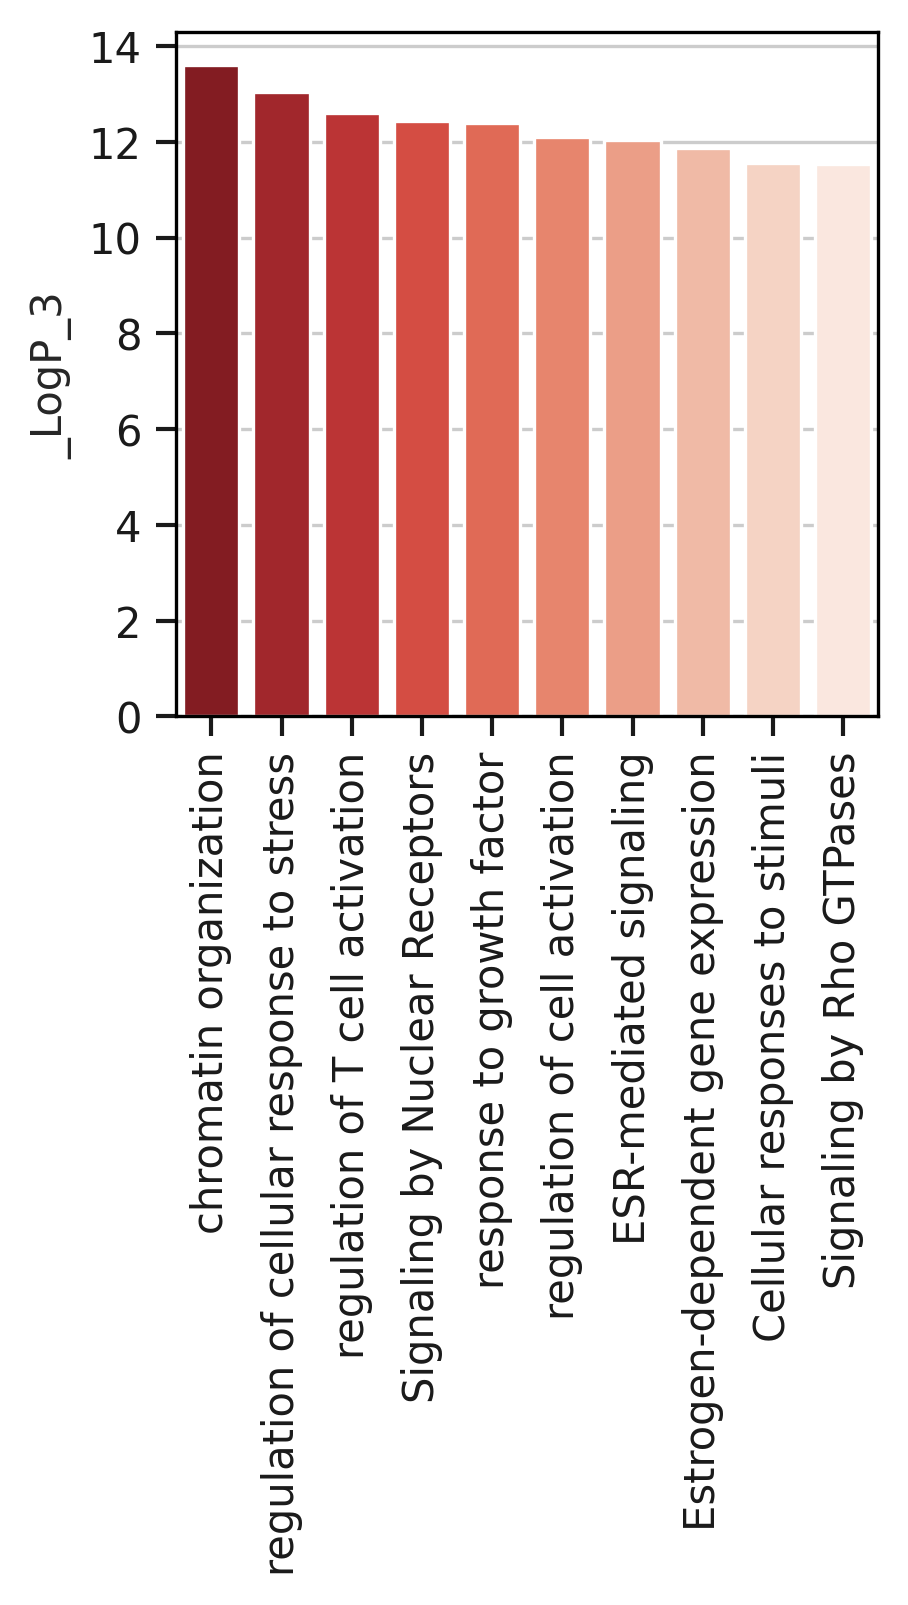

60                                 heart development
123                    urogenital system development
41                         NABA MATRISOME ASSOCIATED
44                              response to wounding
95                                     wound healing
533                              nephron development
185                               kidney development
202                         renal system development
14                             inflammatory response
270    regulation of epithelial cell differentiation
Name: Description, dtype: object


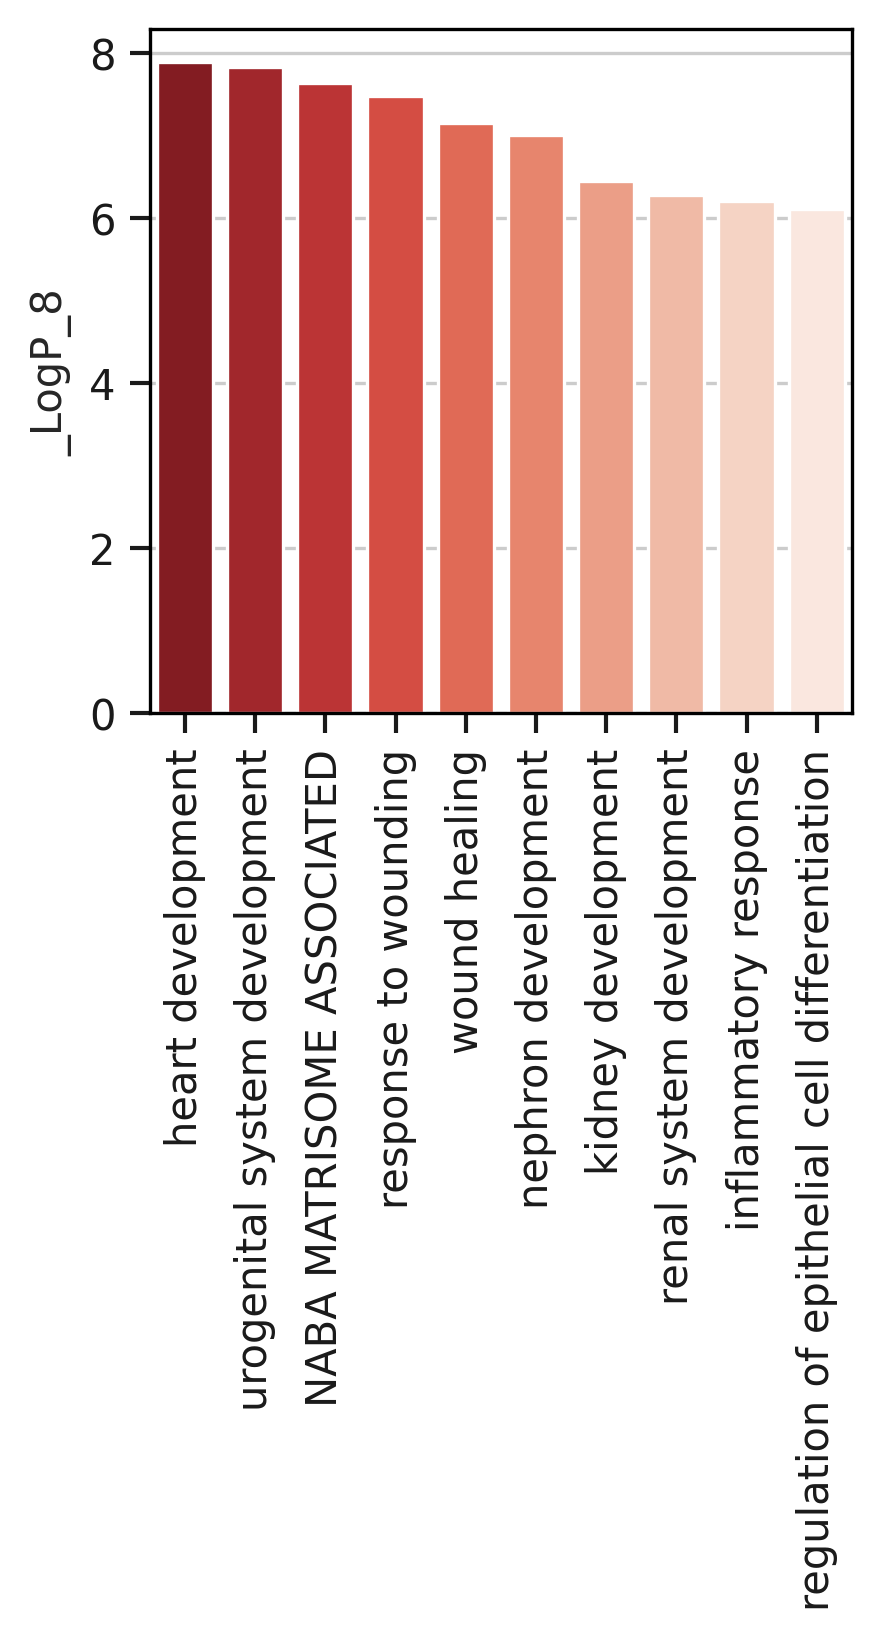

In [100]:
T_cd4_cxcl13_go_term = pd.read_csv('cx_pbmc_immune_results/T_cd4_cxcl13_FINAL_GO.csv')
go_term_top10 = T_cd4_cxcl13_go_term.iloc[np.argsort(T_cd4_cxcl13_go_term['_LogP_0']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_0'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_cxcl13_palantir_pseudotime_gene_cluster_0_GO.pdf',bbox_inches='tight')
plt.show()
go_term_top10 = T_cd4_cxcl13_go_term.iloc[np.argsort(T_cd4_cxcl13_go_term['_LogP_1']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_1'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_cxcl13_palantir_pseudotime_gene_cluster_1_GO.pdf',bbox_inches='tight')
plt.show()
go_term_top10 = T_cd4_cxcl13_go_term.iloc[np.argsort(T_cd4_cxcl13_go_term['_LogP_3']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_3'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_cxcl13_palantir_pseudotime_gene_cluster_3_GO.pdf',bbox_inches='tight')
plt.show()
go_term_top10 = T_cd4_cxcl13_go_term.iloc[np.argsort(T_cd4_cxcl13_go_term['_LogP_8']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_8'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_cxcl13_palantir_pseudotime_gene_cluster_8_GO.pdf',bbox_inches='tight')
plt.show()

0           regulation of cell activation
1      regulation of leukocyte activation
4     regulation of lymphocyte activation
2                      tube morphogenesis
3             regulation of cell adhesion
6                         cell activation
28                   leukocyte activation
41        regulation of T cell activation
10                vasculature development
14             blood vessel morphogenesis
Name: Description, dtype: object


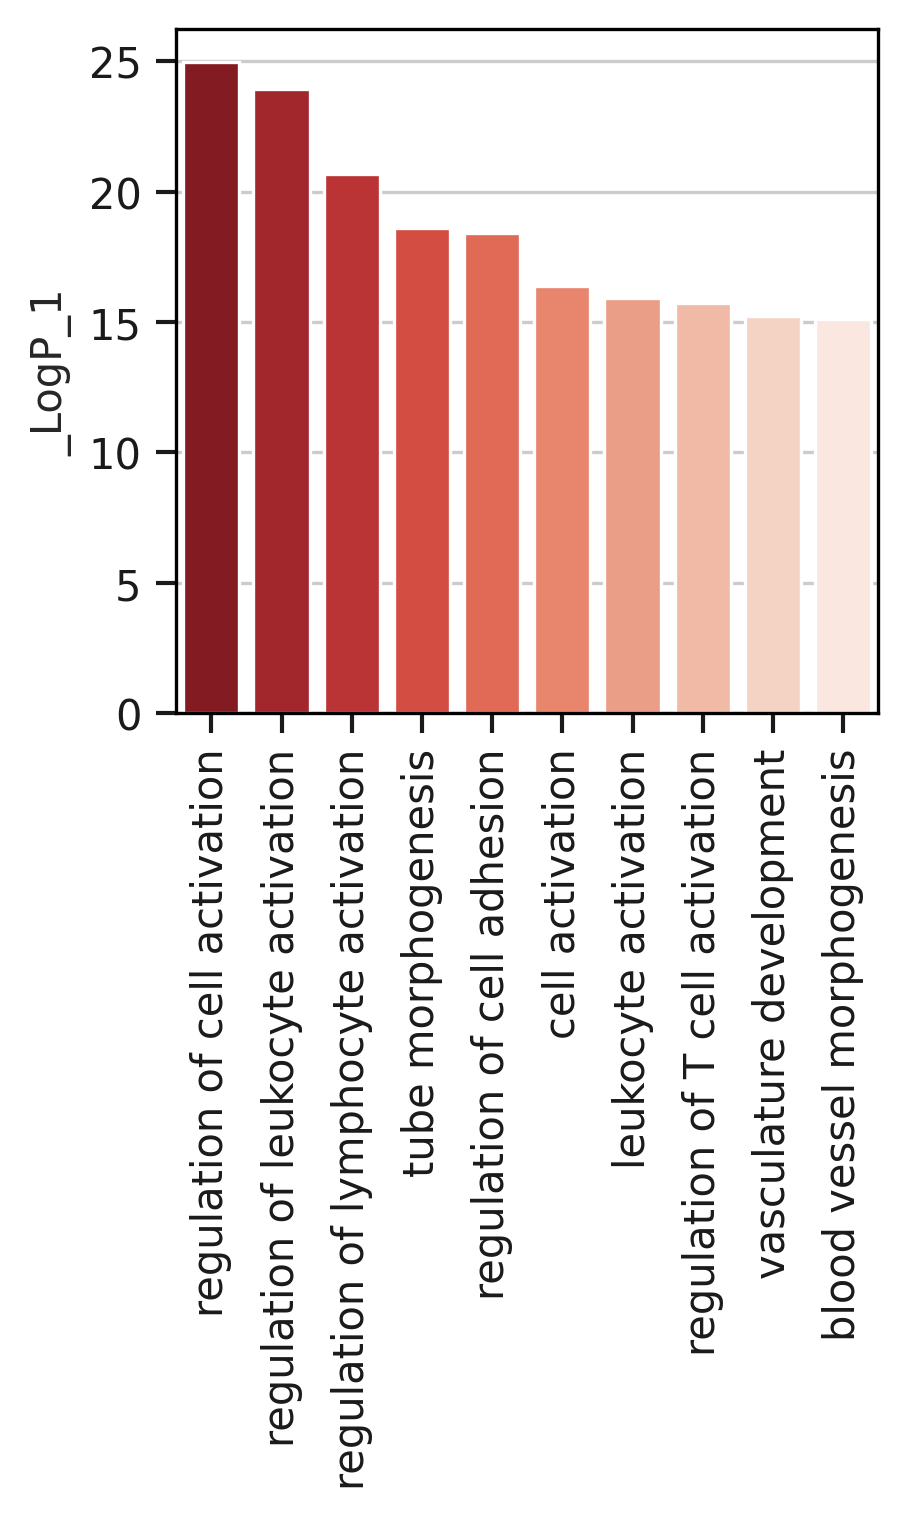

157                        Cellular responses to stimuli
181                         Cellular responses to stress
173            regulation of cellular response to stress
385                               chromatin organization
50                              Signaling by Rho GTPases
55     Signaling by Rho GTPases, Miro GTPases and RHO...
239                   Estrogen-dependent gene expression
7                    Cytokine Signaling in Immune system
214                               ESR-mediated signaling
737             cellular response to DNA damage stimulus
Name: Description, dtype: object


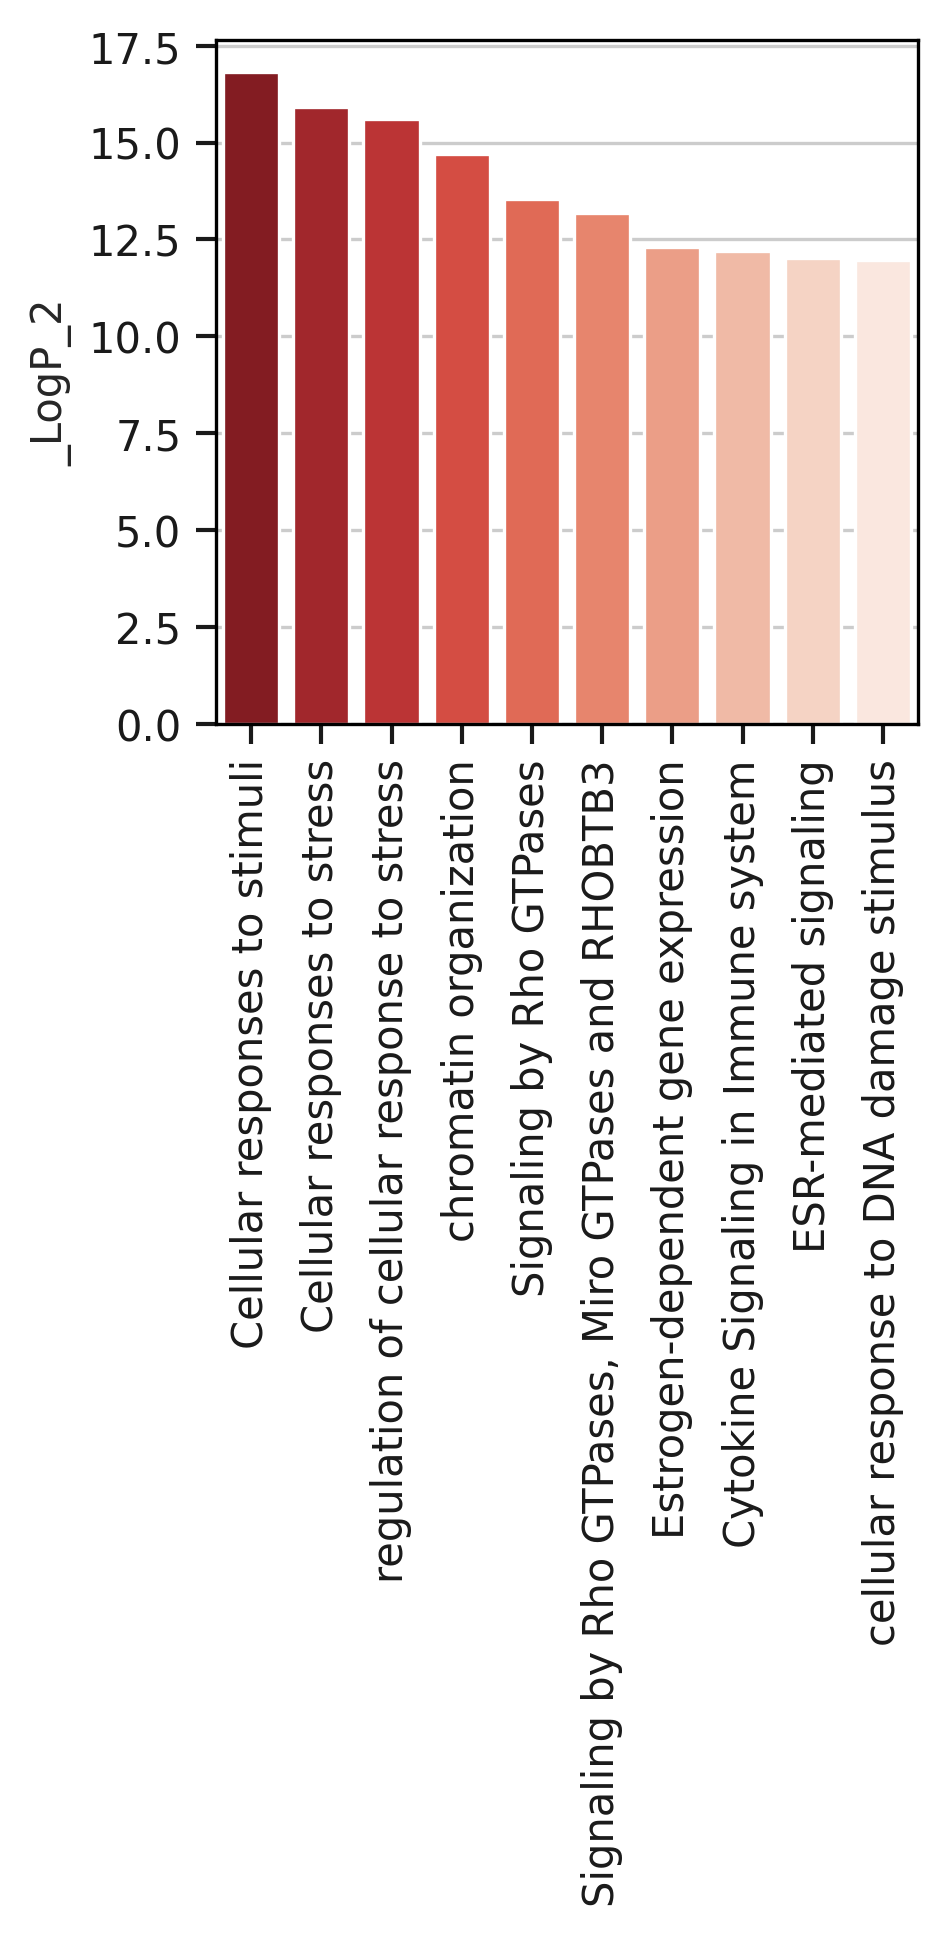

5                 cellular response to cytokine stimulus
7                    Cytokine Signaling in Immune system
3                            regulation of cell adhesion
54                             regulation of hemopoiesis
1                     regulation of leukocyte activation
0                          regulation of cell activation
4                    regulation of lymphocyte activation
32            positive regulation of cytokine production
259      Extrafollicular B cell activation by SARS-CoV-2
55     Signaling by Rho GTPases, Miro GTPases and RHO...
Name: Description, dtype: object


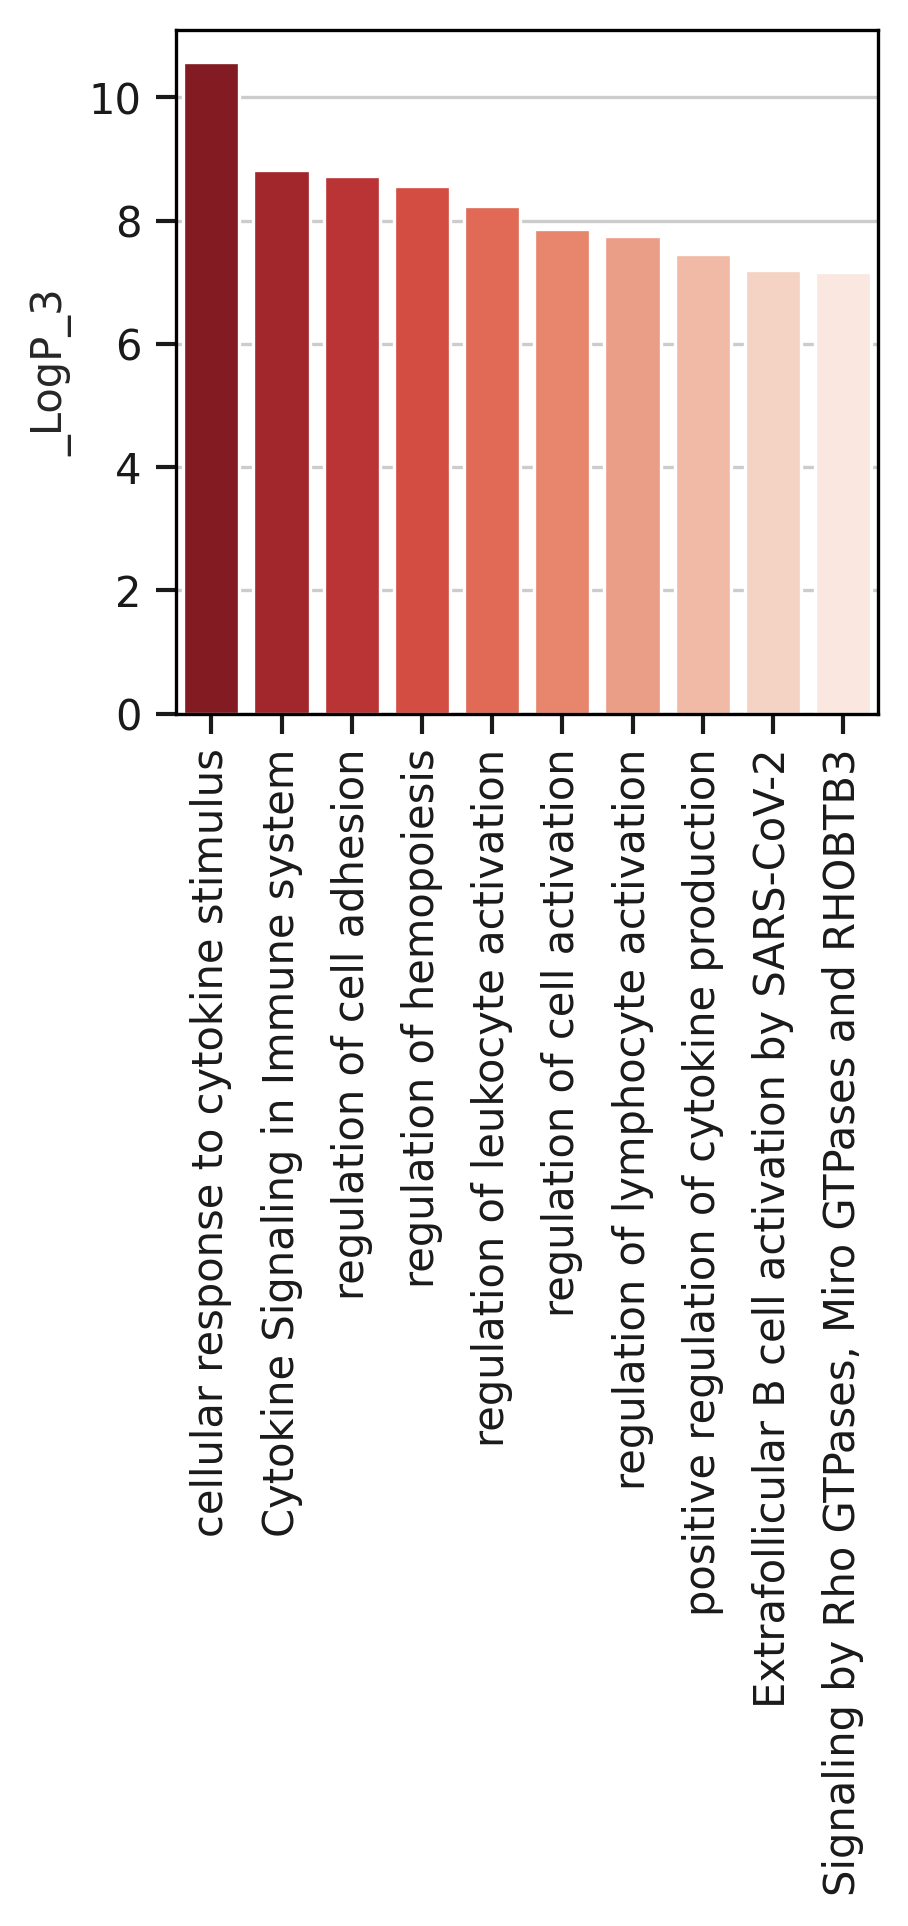

38                            NABA MATRISOME ASSOCIATED
21               Cytokine-cytokine receptor interaction
13                                inflammatory response
48                  cytokine-mediated signaling pathway
5                cellular response to cytokine stimulus
23     enzyme-linked receptor protein signaling pathway
85                                NABA SECRETED FACTORS
17                                           chemotaxis
19                                                taxis
104         Network map of SARS-CoV-2 signaling pathway
Name: Description, dtype: object


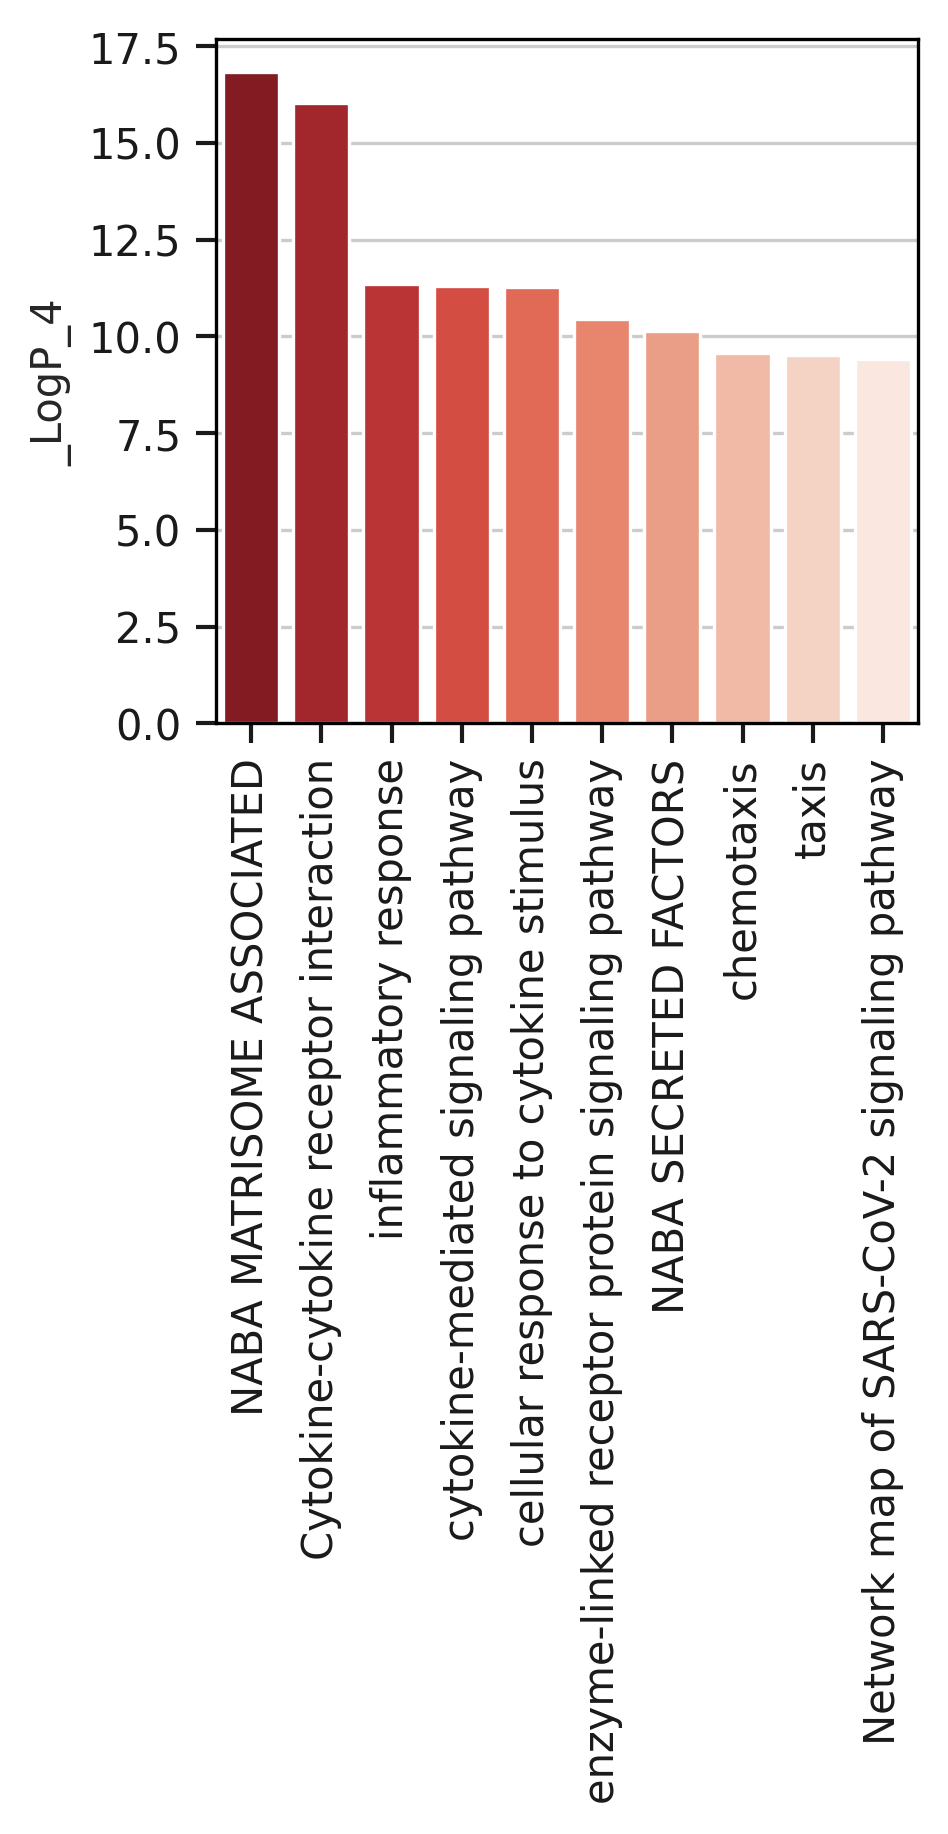

923                                glomerulus development
111                         urogenital system development
439                                   nephron development
442                                   NABA CORE MATRISOME
38                              NABA MATRISOME ASSOCIATED
1312                                 renal system process
49      positive regulation of response to external st...
857                                NABA ECM GLYCOPROTEINS
20                   positive regulation of cell motility
3                             regulation of cell adhesion
Name: Description, dtype: object


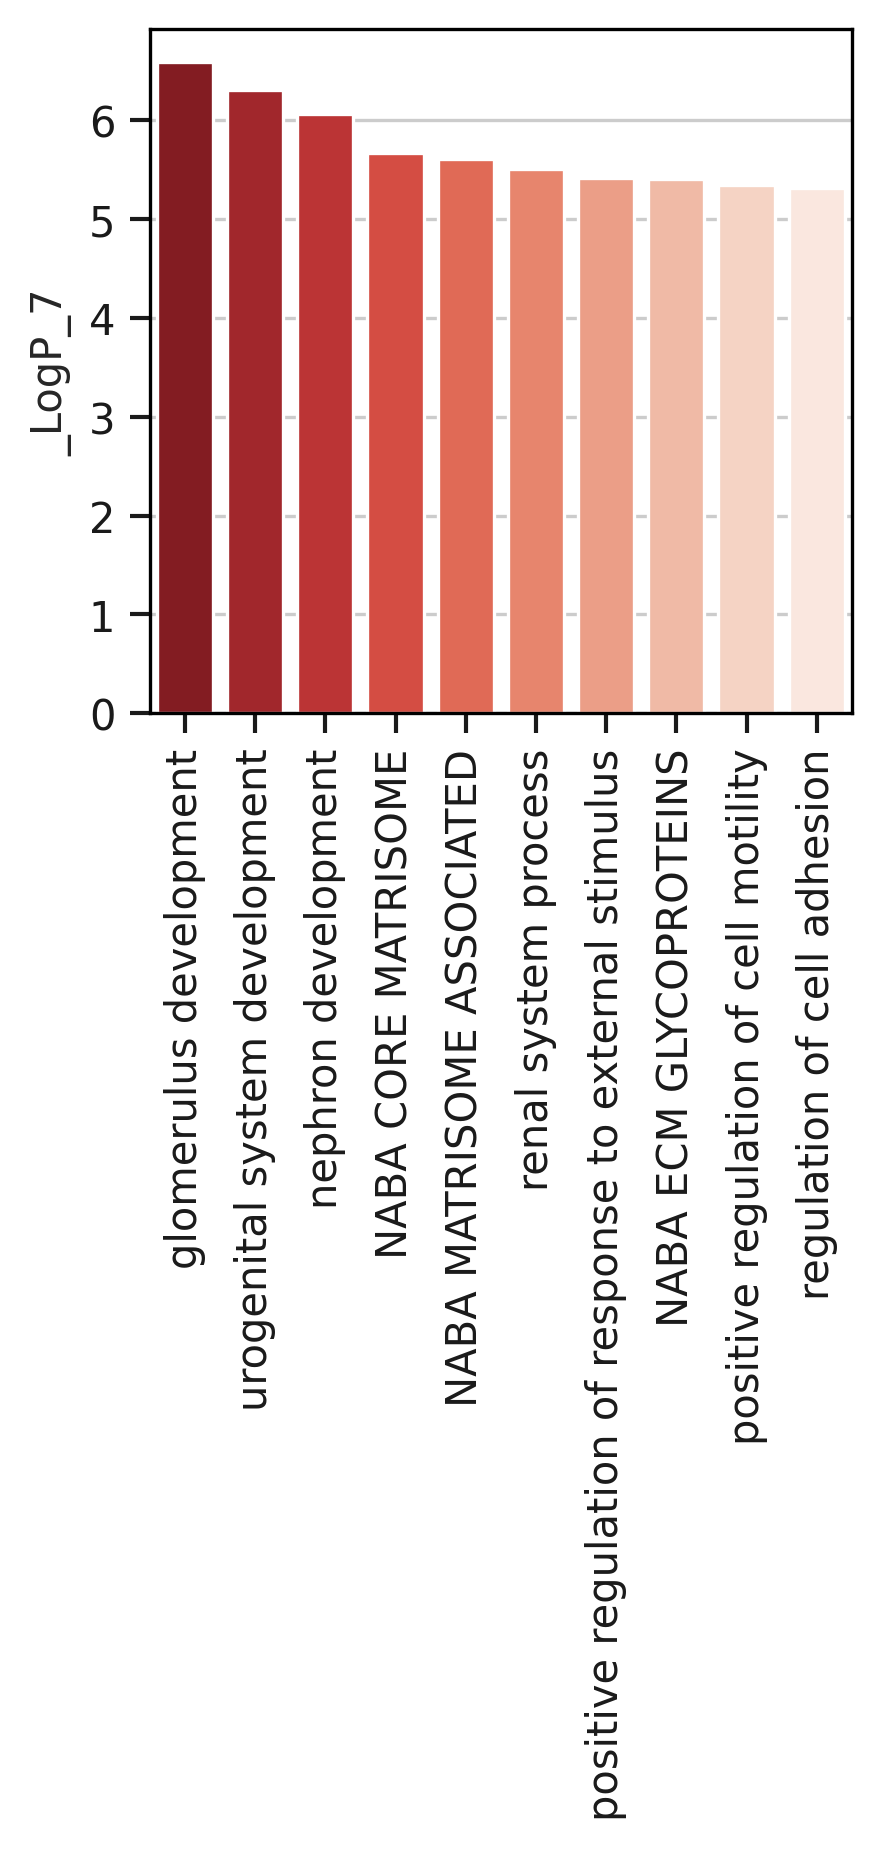

In [101]:
T_cd4_foxp3_go_term = pd.read_csv('cx_pbmc_immune_results/T_cd4_foxp3_FINAL_GO.csv')
go_term_top10 = T_cd4_foxp3_go_term.iloc[np.argsort(T_cd4_foxp3_go_term['_LogP_1']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_1'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_foxp3_palantir_pseudotime_gene_cluster_1_GO.pdf',bbox_inches='tight')
plt.show()
go_term_top10 = T_cd4_foxp3_go_term.iloc[np.argsort(T_cd4_foxp3_go_term['_LogP_2']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_2'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_foxp3_palantir_pseudotime_gene_cluster_2_GO.pdf',bbox_inches='tight')
plt.show()
go_term_top10 = T_cd4_foxp3_go_term.iloc[np.argsort(T_cd4_foxp3_go_term['_LogP_3']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_3'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_foxp3_palantir_pseudotime_gene_cluster_3_GO.pdf',bbox_inches='tight')
plt.show()
go_term_top10 = T_cd4_foxp3_go_term.iloc[np.argsort(T_cd4_foxp3_go_term['_LogP_4']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_4'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_foxp3_palantir_pseudotime_gene_cluster_4_GO.pdf',bbox_inches='tight')
plt.show()
go_term_top10 = T_cd4_foxp3_go_term.iloc[np.argsort(T_cd4_foxp3_go_term['_LogP_7']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_7'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_t_cd4_foxp3_palantir_pseudotime_gene_cluster_7_GO.pdf',bbox_inches='tight')
plt.show()